In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import joblib
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from collections import Counter

In [2]:
dataset = pd.read_excel("dataset.xlsx",  encoding='utf-8')

In [10]:
x = dataset.text
y = dataset.label

cv= CountVectorizer()
cv_train = cv.fit_transform(x.values.astype('U'))
cv_test = cv.transform(y.values.astype('U')).toarray()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(cv_train, y, test_size=0.2, random_state=1)

In [25]:
mlp_rashad = MLPClassifier(max_iter=100, alpha = 0.001, random_state=1, hidden_layer_sizes=(30,30,30))

mlp_rashad.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [26]:
pred_mlp = mlp_rashad.predict(x_test)

In [27]:
print(classification_report(y_test, pred_mlp))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1552
           1       0.87      0.93      0.89      2363

    accuracy                           0.87      3915
   macro avg       0.87      0.85      0.86      3915
weighted avg       0.87      0.87      0.87      3915



In [31]:
inp = input()
# inp = 'zəhləm'
inp = [inp]
inp_c = cv.transform(inp)
input_predict = mlp_rashad.predict(inp_c)
input_predict[0]

text


0

In [23]:
mlp_counter = Counter(dataset.label)

In [24]:
mlp_counter 

Counter({0: 7449, 1: 12123})

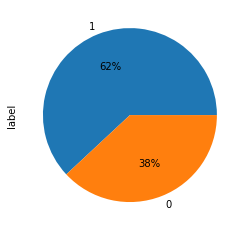

In [4]:
dataset.label.value_counts().plot(kind='pie', autopct='%1.0f%%')